In [1]:
import math #用于数学运算
import numpy as np #numpy库，用于科学计算
import tensorflow as tf #tensorflow库 
import h5py #用于读写数据
import matplotlib.pyplot as plt  #matlab绘图
import matplotlib.image as mping #图像显示
from tensorflow.python.framework import ops 
import cnn_utils #数据库函数
from tensorflow import keras
#coding=utf-8
import os  #打开文件时需要
from PIL import Image
import re
import random
import wtfcv
import cv2

np.random.seed(1)

In [39]:
def plot_image(i, predictions_array, img):
  predictions_array, img = predictions_array, img[i].reshape(64, 64, 3)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)


def plot_value_array(i, predictions_array):
  predictions_array = predictions_array
  plt.grid(False)
  plt.xticks(range(4))
  plt.yticks([])
  thisplot = plt.bar(range(4), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)


def max_index(x):
    max = 0;
    jb = -1;
    for i in range(4):
        if x[i] > max:
            jb = i
            max = x[i]
    return jb

In [3]:
out_list = []
out_label = []
for xxx in range(4):
    dir_path = './hondo_train_image/' + str(xxx) +'/'
    ignore_list = ['.DS_Store']
    image_list=os.listdir(dir_path)   
    for pic in image_list:
        if pic in ignore_list:
            continue
        path = dir_path + pic
        im = Image.open(path)
        im = np.asarray(im) #转成矩阵
        im = im/255
        out_list.append(im)
        out_label.append(xxx)

2
(64, 64, 3)


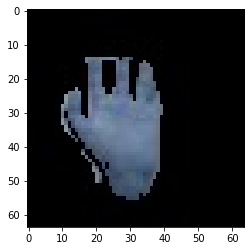

In [8]:
index = 555
plt.imshow(out_list[index])
print(out_label[index])
print(out_list[index].shape)

In [9]:
qiege1 = 800
qiege2 = 600
    



#打乱顺序
cc = list(zip(out_list, out_label))
random.shuffle(cc)
out_list[:], out_label[:] = zip(*cc)

#分割 
train_x_list = out_list[:qiege1]
test_x_list = out_list[qiege1:]
train_y_list = out_label[:qiege1]
test_y_list = out_label[qiege1:]

#分割出测试集
train_x = np.asarray(train_x_list)
test_x = np.asarray(test_x_list)
train_y = np.asarray(train_y_list)
test_y = np.asarray(test_y_list)


train_x_par = train_x[:qiege2]
train_x_val = train_x[qiege2:]
train_y_par = train_y[:qiege2]
train_y_val = train_y[qiege2:]

1
(800, 64, 64, 3)
()


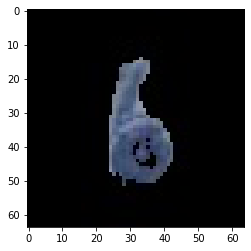

In [19]:
index = 125
plt.imshow(train_x[index])
print(train_y[index])
print(train_x.shape)
print(train_y[index].shape)

In [28]:

model = keras.Sequential([
    keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(32, activation = 'relu',bias_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(4, activation = 'softmax',bias_regularizer=keras.regularizers.l2(0.01))
    
])
model.summary()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 32)        9248      
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4608)             

In [29]:
model.fit(train_x_par, train_y_par, epochs = 25,batch_size = 32 ,validation_data=(train_x_val, train_y_val), verbose = 1)

Train on 600 samples, validate on 200 samples
Epoch 1/25
600/600 [==============================] - 2s 4ms/sample - loss: 1.0479 - accuracy: 0.5017 - val_loss: 0.7990 - val_accuracy: 0.7900
Epoch 2/25
600/600 [==============================] - 2s 3ms/sample - loss: 0.5311 - accuracy: 0.8417 - val_loss: 0.3990 - val_accuracy: 0.8550
Epoch 3/25
600/600 [==============================] - 2s 3ms/sample - loss: 0.2922 - accuracy: 0.9000 - val_loss: 0.3708 - val_accuracy: 0.8650
Epoch 4/25
600/600 [==============================] - 2s 3ms/sample - loss: 0.2038 - accuracy: 0.9333 - val_loss: 0.3215 - val_accuracy: 0.8850
Epoch 5/25
600/600 [==============================] - 2s 4ms/sample - loss: 0.1508 - accuracy: 0.9467 - val_loss: 0.3320 - val_accuracy: 0.8950
Epoch 6/25
600/600 [==============================] - 2s 3ms/sample - loss: 0.1475 - accuracy: 0.9417 - val_loss: 0.3008 - val_accuracy: 0.9000
Epoch 7/25
600/600 [==============================] - 2s 3ms/sample - loss: 0.1115 - accur

In [30]:

#测试集上运行模型，获得测试准确度
test_loss, test_acc = model.evaluate(test_x, test_y, verbose = 2)
print("\nTest accuracy", test_acc)

200/1 - 0s - loss: 0.0854 - accuracy: 0.9650

Test accuracy 0.965


In [31]:
history_dict = model.history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(acc) + 1)

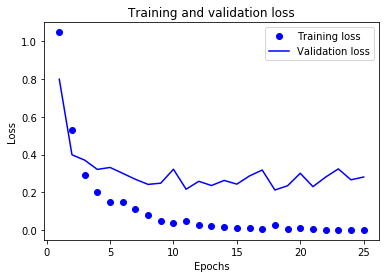

In [32]:

# loss图
# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

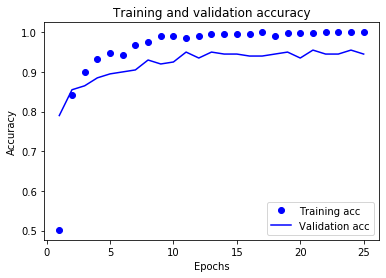

In [33]:
# accu图
plt.clf()   # clear figure
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [34]:
# 测试集上预测 查看
prediction = model.predict(test_x)

2
[9.9975222e-01 5.9016489e-05 1.8879515e-04 8.3880687e-11]
0


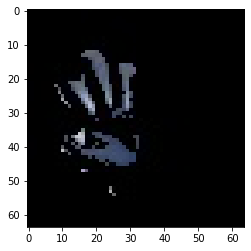

In [45]:
index = 109
plt.imshow(test_x[index])
print(test_y[index])
print(prediction[index])
print(max_index(prediction[index]))

In [41]:
#找出 预测错误的集：
for i in range(test_y.shape[0]):
    if test_y[i] != max_index(prediction[i]):
        print(i, end=", ")

30, 41, 54, 109, 145, 148, 155, 

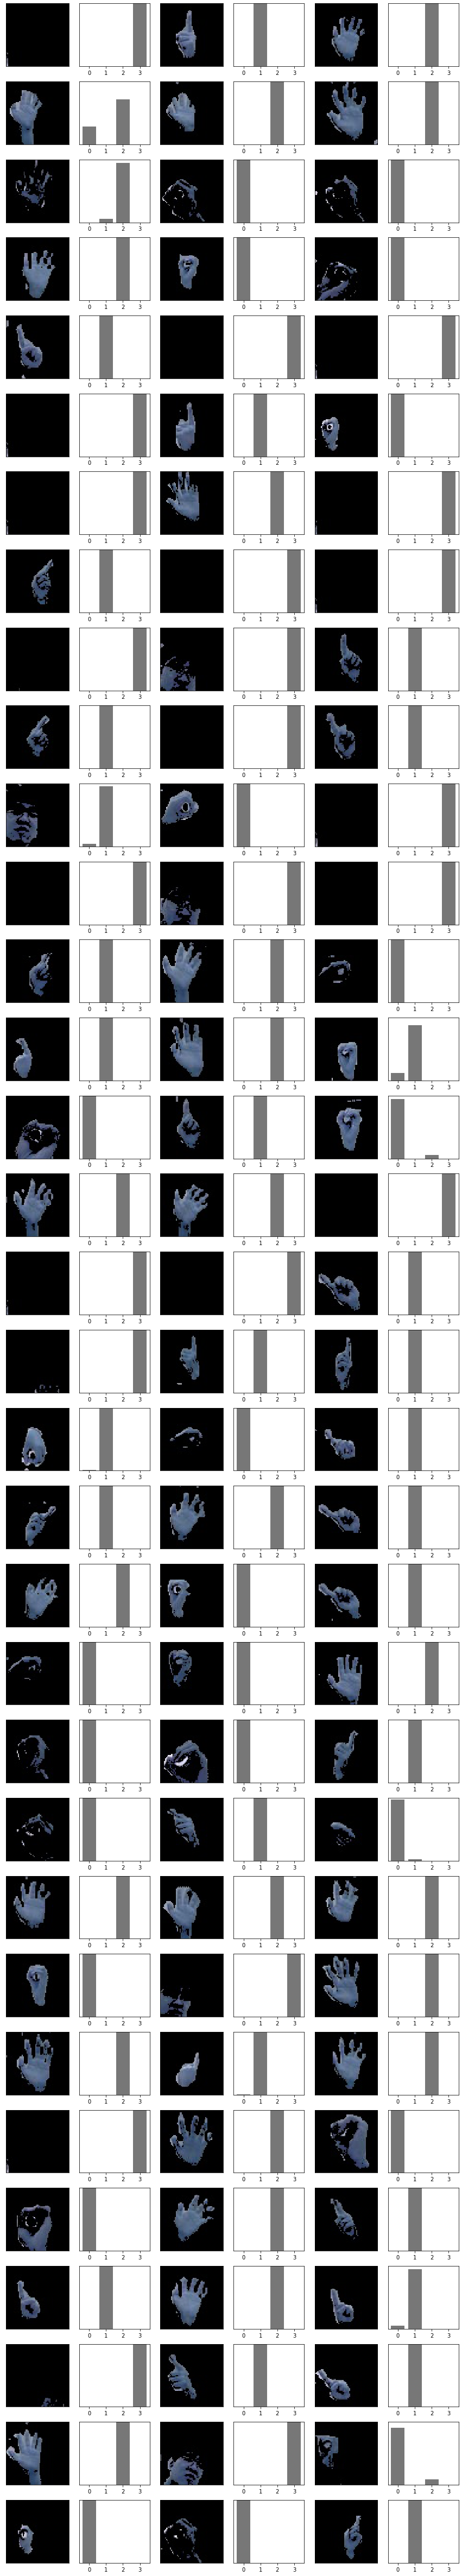

In [40]:
num_rows = 33
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, prediction[i], test_x)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, prediction[i])
plt.tight_layout()
plt.show()

In [46]:
model.save("./model/2.h5")